<a href="https://colab.research.google.com/github/T3mofey/Sirius_cv/blob/main/cv_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


MyPipe.py:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyPipe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

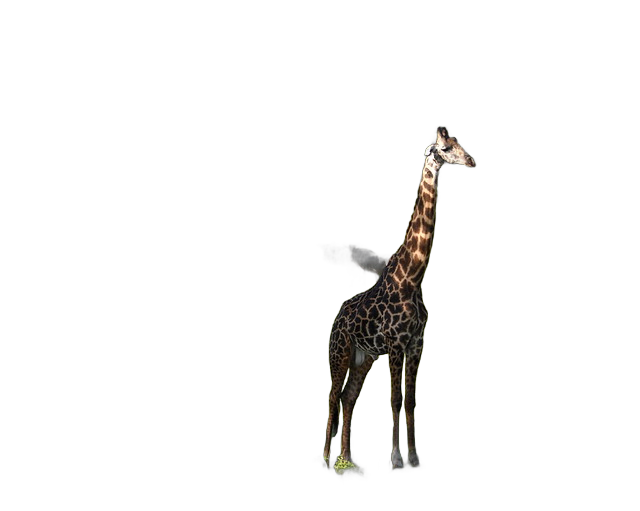

In [ ]:
pillow_image

In [ ]:
import sys
import os
import json

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
import numoy as np
from PIL import Image
import gc

modelNames={0:"briaai/RMBG-1.4",
            1:"nvidia/segformer-b0-finetuned-ade-512-512",
            2:"ZhengPeng7/BiRefNet"
    }

In [3]:
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
from PIL import Image
import requests

processor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

In [7]:
outputs

SemanticSegmenterOutput(loss=None, logits=tensor([[[[ -4.6310,  -5.5232,  -6.2356,  ...,  -4.9868,  -4.7341,  -4.6612],
          [ -5.1921,  -6.1444,  -6.5996,  ...,  -5.1771,  -5.0288,  -5.1761],
          [ -5.4424,  -6.2790,  -6.7574,  ...,  -5.2748,  -5.1669,  -5.0999],
          ...,
          [ -8.5836,  -9.0887,  -9.5409,  ...,  -8.7190,  -8.5183,  -8.3098],
          [ -8.4320,  -8.8555,  -9.1848,  ...,  -7.7831,  -7.4822,  -7.3598],
          [ -8.3224,  -8.8764,  -9.1849,  ...,  -7.1564,  -6.8759,  -6.6428]],

         [[-12.1391, -13.3122, -13.9554,  ..., -11.8693, -11.5761, -11.3418],
          [-12.8732, -13.9352, -14.3563,  ..., -12.3348, -12.1524, -12.3176],
          [-12.9438, -13.8226, -14.2513,  ..., -12.3360, -12.3081, -12.2396],
          ...,
          [-13.9108, -14.2715, -14.6169,  ..., -13.2829, -13.3424, -13.3222],
          [-13.8718, -14.2715, -14.3808,  ..., -12.5270, -12.4334, -12.3057],
          [-13.6848, -14.2857, -14.5154,  ..., -11.8523, -11.8534, -